In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from einops import rearrange
from PIL import Image
from tqdm import tqdm
import json
import time
from pathlib import Path
from sklearn import linear_model
import mediapy as media

In [3]:
!ls -lt baselines

total 1400
-rw-rw-r-- 1 lukas lukas 735122 jun  9 20:26 Visualizations_over_time.ipynb
drwxrwxr-x 2 lukas lukas   4096 jun  9 19:14 session_57aed02d
-rw-rw-r-- 1 lukas lukas   2448 jun  9 19:04 run_preetreined_interactive.py
drwxrwxr-x 3 lukas lukas   4096 jun  9 19:03 session_71f6678a
drwxrwxr-x 6 lukas lukas  12288 jun  9 19:03 session_a7949f2e
-rw-rw-r-- 1 lukas lukas   3156 jun  9 19:02 run_baseline_parallel_fast.py
drwxrwxr-x 3 lukas lukas   4096 jun  9 19:02 session_0ffc91b6
drwxrwxr-x 3 lukas lukas   4096 jun  9 18:54 session_3cbc8032
drwxrwxr-x 2 lukas lukas   4096 jun  9 18:49 session_1a42d30e
drwxrwxr-x 2 lukas lukas   4096 jun  9 12:26 __pycache__
-rw-rw-r-- 1 lukas lukas  23065 jun  9 12:25 zelda_gym_env.py
drwxrwxr-x 2 lukas lukas   4096 jun  9 12:21 session_9cc04126
drwxrwxr-x 2 lukas lukas   4096 jun  9 12:20 session_c3ade57d
drwxrwxr-x 5 lukas lukas  12288 jun  9 12:17 session_01ae1580
drwxrwxr-x 4 lukas lukas   4096 jun  9 05:40 session_0d33420d
drwxrwxr-x 3 lukas luka

In [4]:
def load_run_data(run_path):
    run_lists = []
    for p in Path(run_path).glob('all_runs_*.json'):
        with open(p, 'r') as f:
            run_lists.append(json.load(f))
    all_runs = [val for tup in zip(*run_lists) for val in tup]
    print(f'runs loaded: {len(all_runs)}')
    return all_runs

In [59]:
def plot_runs(
    all_runs, use_keys=None, 
    plot_fit=False, plot_line=False, 
    start=0, group_runs=1,
    agg_func=np.mean):
    
    all_runs = all_runs[start:]
    x = np.arange(len(all_runs)//group_runs)
    
    def add_plot(y, name, alpha, size, plot_line, plot_fit):
        plt.scatter(x, y, alpha=alpha, s=size, label=name)
        if plot_line:
            plt.plot(x, y, alpha=alpha, label=name)
        if plot_fit:
            regr = linear_model.LinearRegression()
            # Optimize linear model
            regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

            # Make predictions using the testing set
            lin_y = regr.predict(x.reshape(-1, 1))
            plt.plot(x, lin_y, linewidth=3)
    
    # convert list of dictionaries to dictionary of lists
    metrics = {m: [run[m] for run in all_runs] for m in all_runs[0].keys()}
    metrics['total'] = [sum([v for _,v in run.items()]) for run in all_runs]
    if group_runs:
        for m, dat in metrics.items():
            metrics[m] = agg_func(np.array(dat).reshape(-1, group_runs), 1)
    available_keys = metrics.keys()
    print(f'available metrics: {list(available_keys)}')
    if use_keys is None:
        use_keys = available_keys
    
    ## TODO subplot for each metric ## 
    NUM_COLORS = len(use_keys)
    cm = plt.get_cmap('Dark2')
    cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure(figsize = (12, 8))

    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

    for i, m in enumerate(use_keys):
        add_plot(
            np.array(metrics[m]), m, 1.0, 3.0, plot_line, plot_fit
        )

    plt.title('Recompensas ao longo das iterações do PPO')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Recompensa', fontsize=12)
    plt.xlabel('Iteração', fontsize=12)
    #plt.show()
    plt.savefig('rewards.png', bbox_inches='tight')

In [60]:
def get_latest_grid(pth):
    imgs = np.array([np.array(Image.open(p)) for p in Path(pth).glob('curframe*.jpeg')])
    grid = rearrange(imgs, '(h2 w2) h w c -> (h2 h) (w2 w) c', w2=5)
    return grid

In [61]:
'''
get_im_func = lambda: get_latest_grid('baselines/session_d34118d3')

with media.VideoWriter('test_grid.mp4', get_im_func().shape[:2]) as wr:
    for i in range(500):
        #wr.add_image(get_im_func())
        #time.sleep(1)
'''        

"\nget_im_func = lambda: get_latest_grid('baselines/session_d34118d3')\n\nwith media.VideoWriter('test_grid.mp4', get_im_func().shape[:2]) as wr:\n    for i in range(500):\n        #wr.add_image(get_im_func())\n        #time.sleep(1)\n"

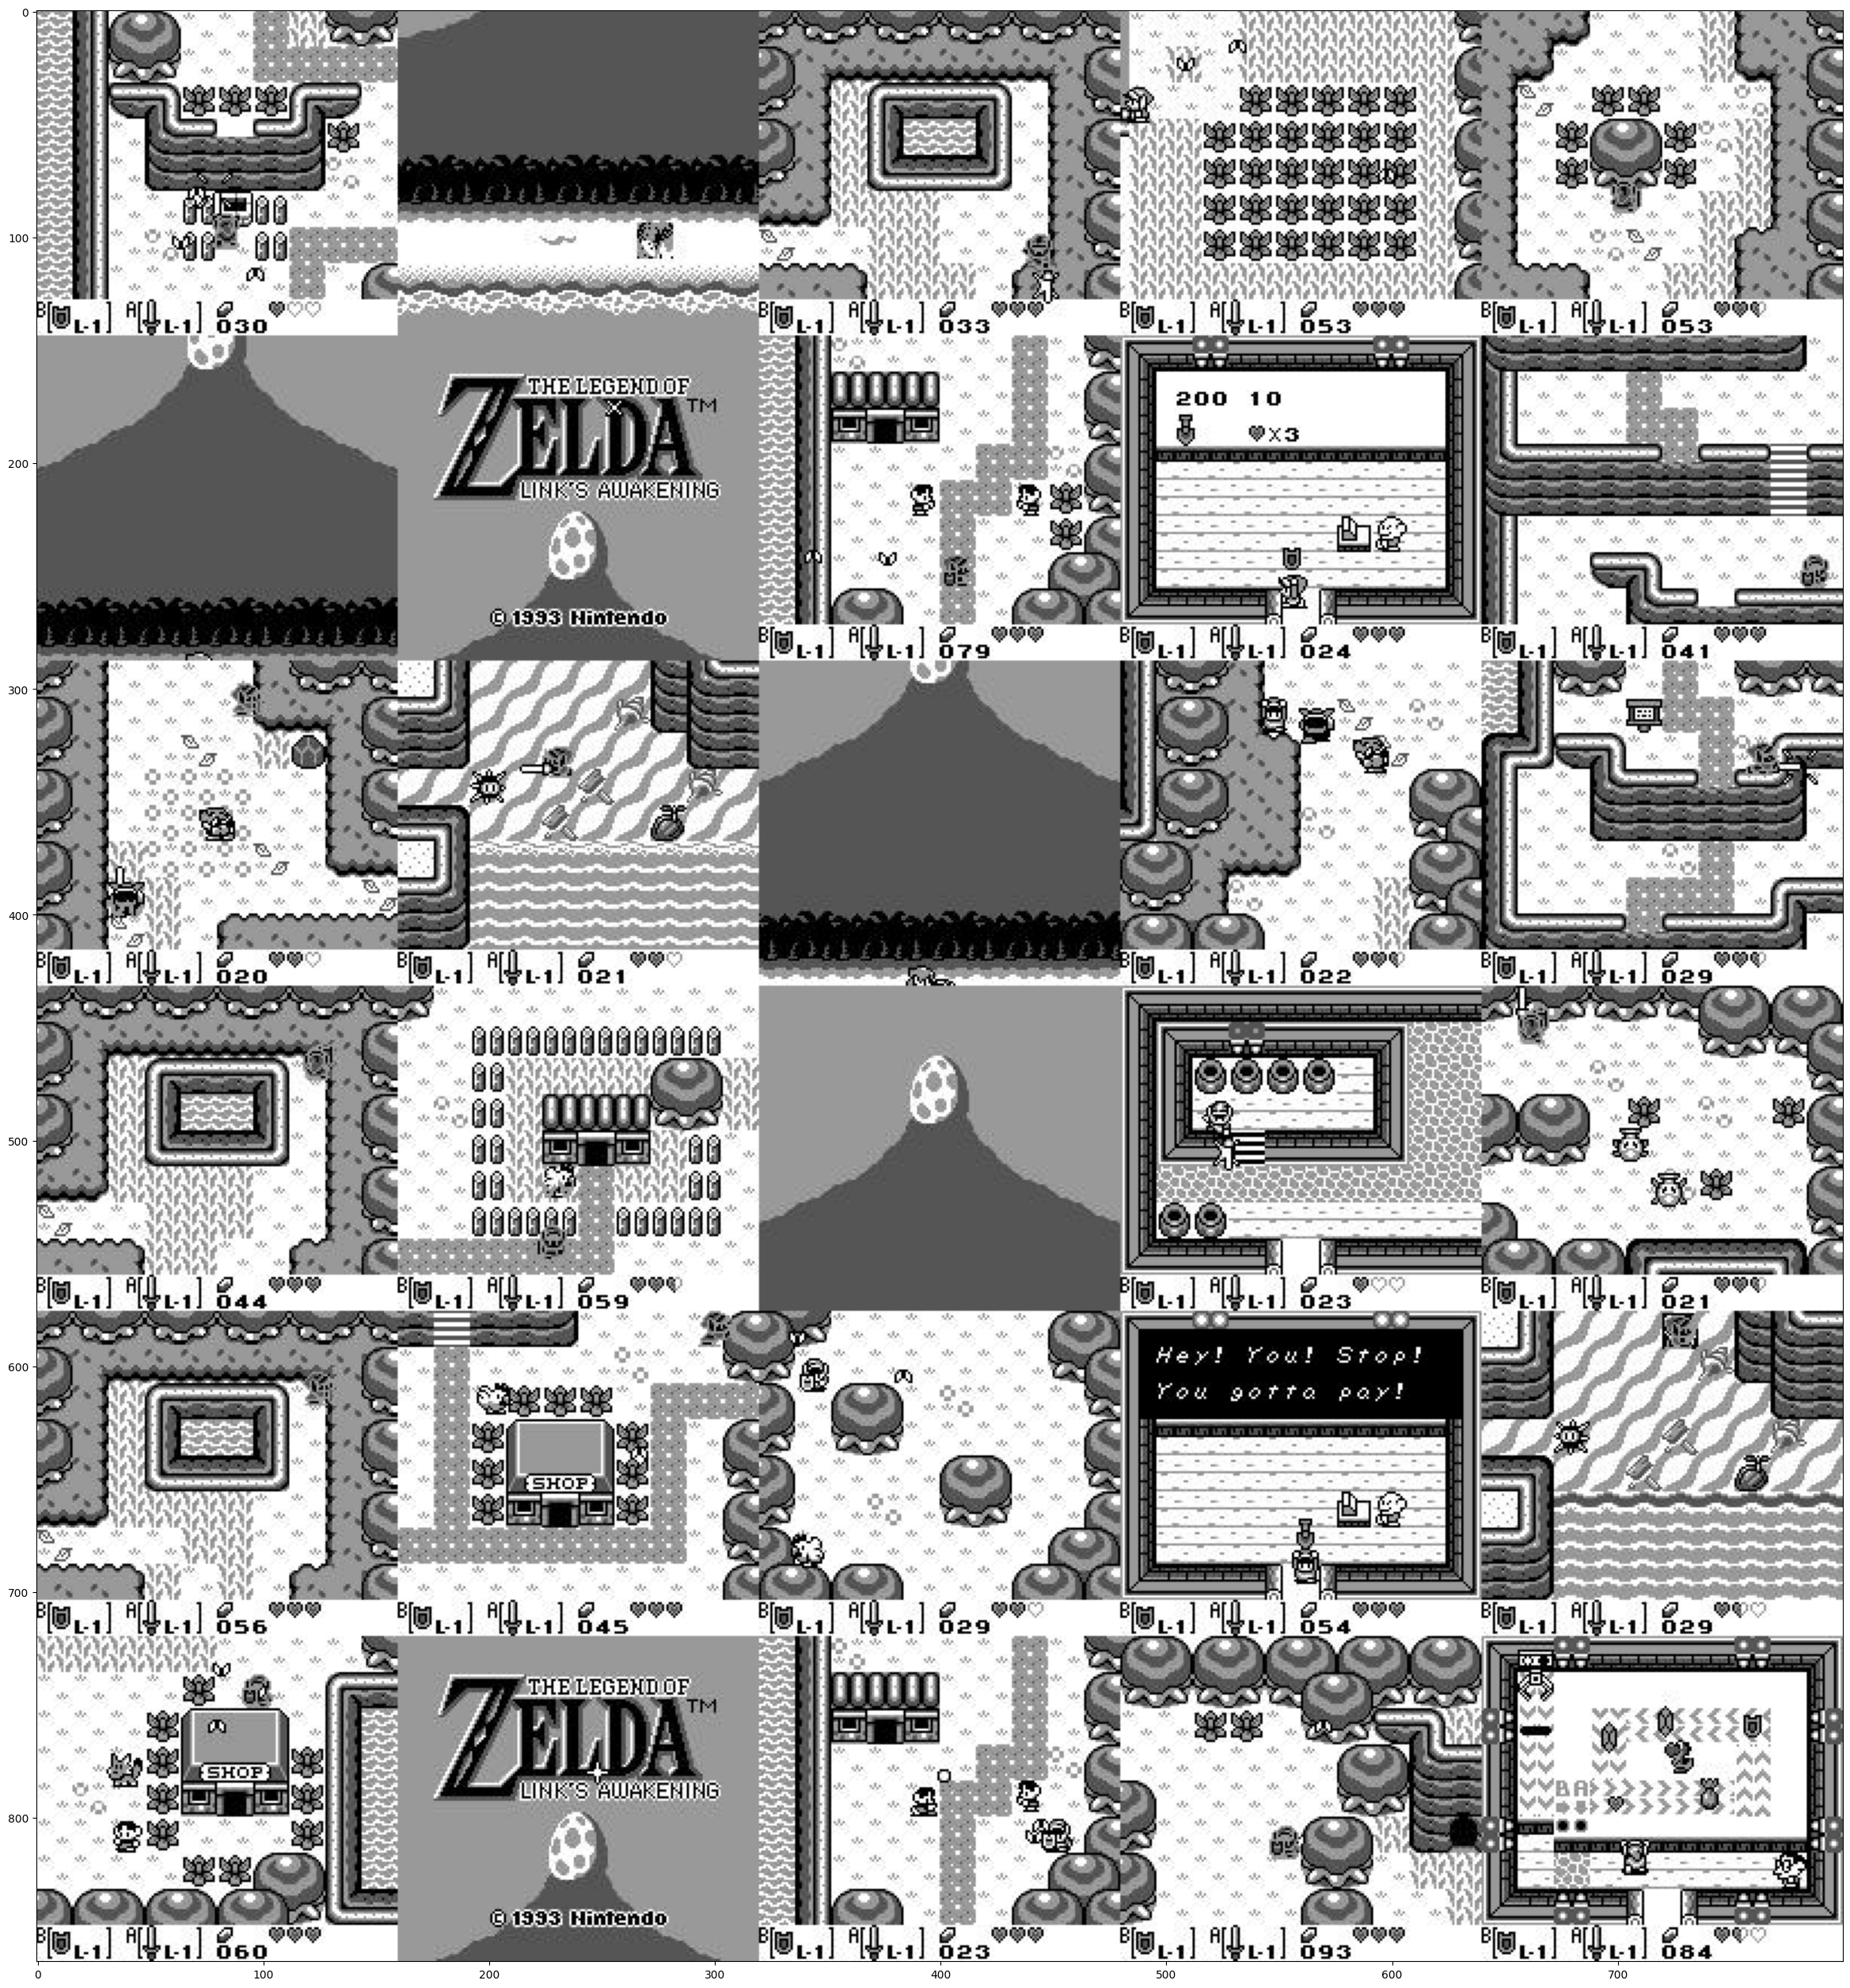

In [62]:
plt.figure(figsize = (32, 32))
plt.imshow(get_latest_grid('baselines/session_cf9cd181'))

In [63]:
(29556736 - 25952256) / (1024*16*44)

5.0

runs loaded: 240
available metrics: ['level', 'heal', 'dead', 'rupees', 'enemies_killed', 'heart_pieces', 'event', 'explore', 'total']


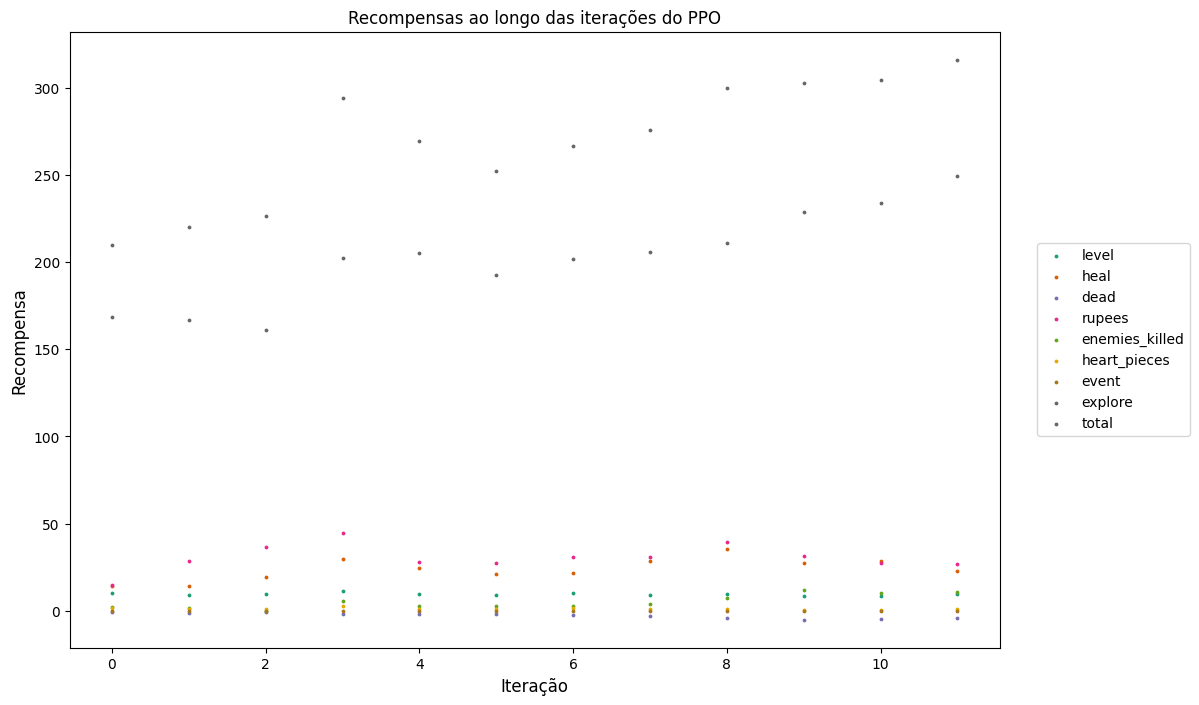

In [64]:
plot_runs(
    load_run_data('baselines/session_cf9cd181'),
    use_keys=None,
    plot_line=False,
    plot_fit=False,
    start=20*0,
    group_runs=20,
    agg_func=np.mean
)

In [42]:
len(load_run_data('baselines/session_b51d9905'))

runs loaded: 504


504

In [29]:
def chunks(data, n):
    n = max(1, n)
    return [data[i:i+n] for i in range(0, len(data), n)]

In [31]:
full_dat = load_run_data('baselines/session_b51d9905')
for run in full_dat:
    run["total"] = sum(value for value in run.values())
full_dat_chunks = chunks(full_dat, 16)

runs loaded: 504


In [32]:
full_dat[0]

{'level': 0,
 'heal': 0,
 'dead': -1.2000000000000002,
 'rupees': 0,
 'enemies_killed': 0,
 'event': 0,
 'explore': 92.0,
 'total': 90.8}

In [33]:
def histo_plot(axis, stat, dat_chunks, version, compare_count):
    
    test_dat = np.array([run[stat] for run in dat_chunks[version]])
    # the histogram of the data
    n, bins, patches = axis.hist(test_dat, 10, density=False, facecolor="orange", alpha=0.95)
    
    for i in range(compare_count):
        comp_version = max(version - 1 - i, 0)
        compare_dat = np.array([run[stat] for run in dat_chunks[comp_version]])
        n, bins, patches = axis.hist(compare_dat, 10, density=False, facecolor="grey", alpha=0.2*0.25**i)

    axis.set(xlabel=f"{stat}")
    #axis.ylabel()
    # only use this title over all plots
    #axis.title()
    #plt.xlim(40, 160)
    #plt.ylim(0, 0.03)
    #axis.grid(True)
    #plt.show()

In [65]:
def plot_all(dat_chunks, version, compare_count):
    fig, axs = plt.subplots(2, 4, figsize=(16, 9), dpi=120)
    #plt.subplots_adjust(bottom=0.0, right=0.8, top=0.9)
    fig.suptitle(f"Version {version} Rewards")
    for stat, ax in zip(dat_chunks[0][0].keys(), axs.flatten()):
        histo_plot(ax, stat, dat_chunks, version, compare_count)
    return fig


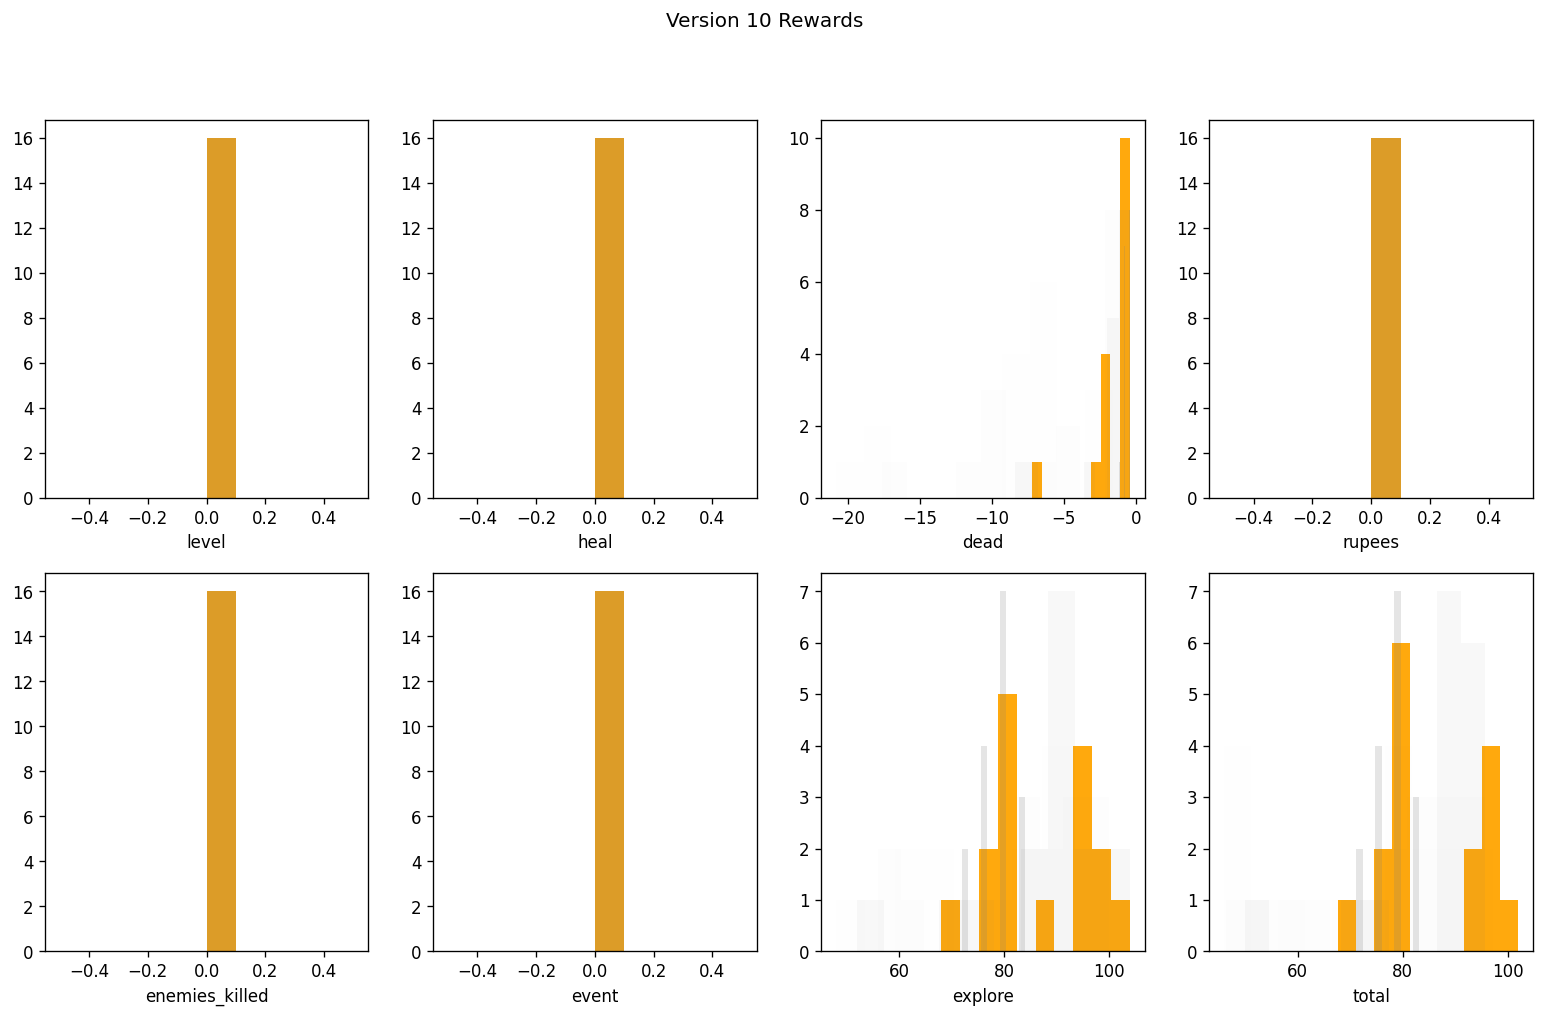

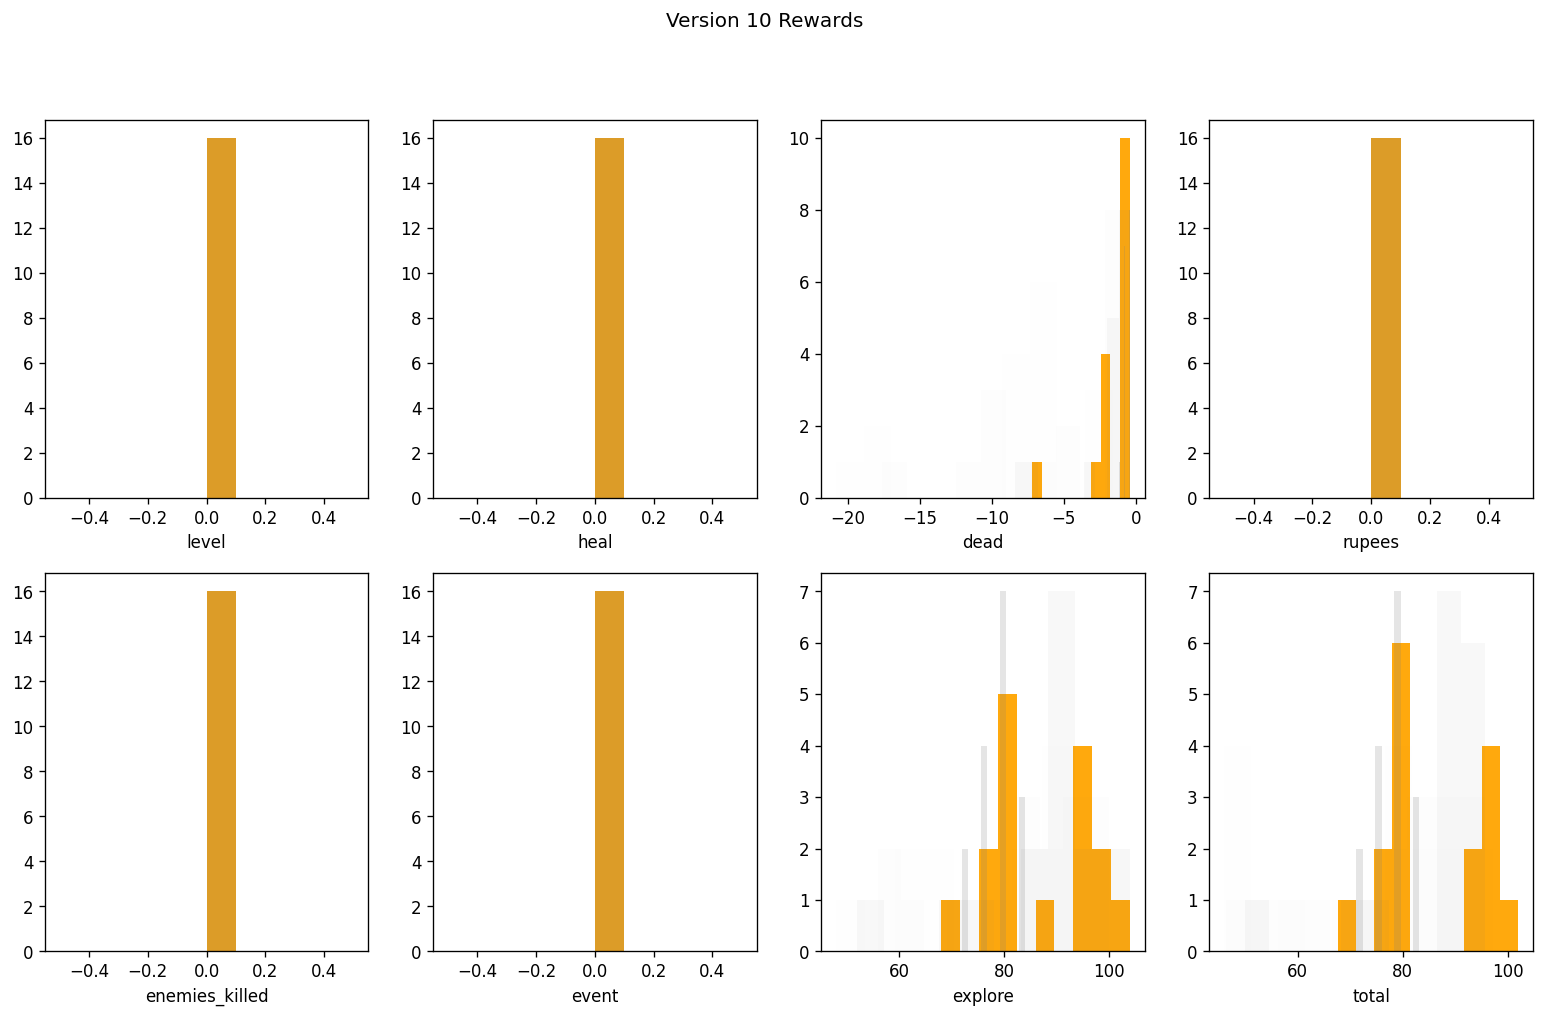

In [66]:
plot_all(chunks(full_dat, 16), 10, 5)

In [67]:
#histo_plot("level", )

In [69]:
with media.VideoWriter('histograms_over_time.mp4', (1080, 1920)) as wr:
    for i in tqdm(range(32)):
        #with plt.style.context('Solarize_Light2'):
        fig = plot_all(full_dat_chunks, i, 5)

        fig.canvas.draw()
        #plt.show()
        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        wr.add_image(data)
        plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:18<00:00,  1.71it/s]
